#### [PREV](2.OOP_Multi_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](4.OOP_Logistic_Regression.ipynb)

---

# OOP Polynomial Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Polynomial Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [2]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Features variable
X_insects = insects[['continent', 'latitude', 'sex']]
# Target variable
y_insects = insects['wingsize']

insects.head()

continent  latitude  sex  wingsize
0          1      35.5    0       901
1          1      37.0    0       896
2          1      38.6    0       906
3          1      40.7    0       907
4          1      40.9    0       898

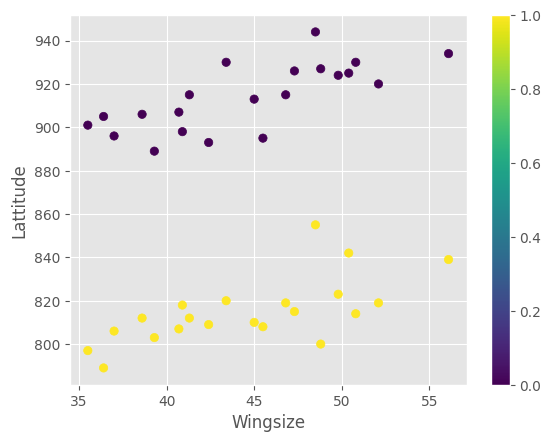

In [3]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.latitude, insects.wingsize, c=insects['sex'])
plt.xlabel("Wingsize")
plt.ylabel("Lattitude")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [4]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [5]:
# Instantiate a polynomial feature with 4 degrees
poly = PolynomialFeatures(degree=4, include_bias=False)

# Fit and transform the features
poly_features = poly.fit_transform(X_insects)

# Fit the regression model
insects_regression.fit(poly_features, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [6]:
# Predict the target for the whole dataset
wing_size_predictions = insects_regression.predict(poly_features)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})
new_poly_features = poly.fit_transform(new_insect)
new_insect['wingsize'] = insects_regression.predict(new_poly_features)
print(f"New insect is:\n{new_insect}")

New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  900.838453


#### Step 5: Plot the Predictions

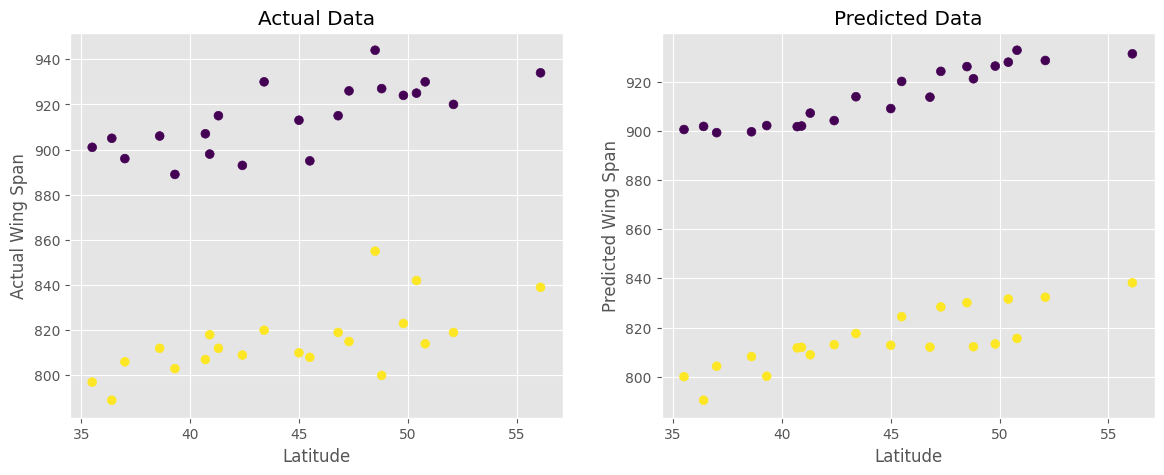

In [7]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()

#### Step 6: Evaluate The Model

In [8]:
#Get Evalutative Data from the model
print(f"Model coefficient :{insects_regression.coef_}")
print(f"Model y intercept :{insects_regression.intercept_}")

mae = mean_absolute_error(y_true=y_insects,y_pred=wing_size_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=wing_size_predictions)
print("MAE:",mae) 
print("MSE:",mse) 

Model coefficient :[-6.19446572e+02 -6.65796012e+02 -3.08550331e+02 -6.19446573e+02
  6.01729837e+01 -2.04951976e+01  2.14846346e+01  2.36071852e+01
 -3.08550331e+02 -6.19446572e+02  6.01729837e+01 -2.04951976e+01
 -2.17658429e+00  2.74465655e+00 -2.04951976e+01 -3.03989250e-01
 -7.32313758e-01  2.36071852e+01 -3.08550331e+02 -6.19446572e+02
  6.01729837e+01 -2.04951976e+01 -2.17658429e+00  2.74465655e+00
 -2.04951976e+01  3.46768939e-02 -1.22510704e-01  2.74465655e+00
 -2.04951976e+01  1.59597505e-03  1.00673407e-02 -7.32313785e-01
  2.36071852e+01 -3.08550331e+02]
Model y intercept :8529.656235973736
MAE: 6.944478017689779
MSE: 86.05639148345008


In [9]:
#Optional: Manually Evaluate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': abs(insects_regression.predict(poly_features).round(2) - y_insects)**2
})
model_cost = 1 / (2 * model_loss.shape[0]) * model_loss['Loss'].sum()

print(f"The cost of this model is {model_cost:.5f}")
print(model_loss)

The cost of this model is 43.02482
    Target  Predicted result      Loss
0      901        900.508035    0.2401
1      896        899.231075   10.4329
2      906        899.593423   41.0881
3      907        901.677733   28.3024
4      898        901.938425   15.5236
5      893        904.143305  124.0996
6      913        909.027599   15.7609
7      915        913.672391    1.7689
8      927        921.152196   34.2225
9      924        926.305146    5.3361
10     930        932.750671    7.5625
11     905        901.768438   10.4329
12     889        902.115465  172.1344
13     915        907.180787   61.1524
14     930        913.846703  260.8225
15     895        920.062456  628.0036
16     926        924.159911    3.3856
17     944        926.091464  320.7681
18     925        927.897274    8.4100
19     920        928.578589   73.6164
20     934        931.298915    7.2900
21     797        800.017196    9.1204
22     806        804.261751    3.0276
23     812        808.189178 